In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import numpy.fft as fft
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from data_vizualization import curvatire_viz, metrics_plotting_with_events
from data_preprocessing import features_calculation, join_data_v2, get_events_summary
from renameFeatures import rename_features, join_data, get_data_summary

In [2]:
from mpl_toolkits import mplot3d

In [6]:
PATH = "C:\\Users\\vladv\\predictiveAnalytics\\data\\1"

In [7]:
summary = get_data_summary(PATH)

Skipping file curvature.csv
Skipping file dailyLosses.csv
Skipping file data_summary.csv
Skipping file eventsData.csv
Skipping file eventsData2.csv
Skipping file full_data.csv
Skipping file full_data_events.csv
Skipping file joined_data.csv
Skipping file measurments.csv
Skipping file rulesCheck.csv
Skipping file test_file.csv
Skipping file VSP.csv
Skipping file wellsState.csv


In [8]:
summary

,file_name,total_rows,nan_rows,zero_rows,duplicates,unique_values,mean_value,mean_shift,max_shift,max_shift_from,min_shift,min_date,max_date,well
0,activePower,177795,0,4101,0,996,38.155761,0 days 00:02:54.601043904,2 days 01:46:00,"27161 2021-09-10 14:34:04 Name: time, dtype:...",0 days 00:00:01,2021-01-06 16:55:35,2021-12-31 23:59:13,1
4,electricityGage,1758,0,10,0,334,1607.738390,0 days 04:54:32.331246442,2 days 03:11:39,"1156 2021-09-09 14:34:02 Name: time, dtype: ...",0 days 03:00:26,2021-01-05 16:55:32,2021-12-31 02:00:18,1
7,frequency,175376,0,4056,0,669,93.556561,0 days 00:02:57.009374198,2 days 01:45:59,"27015 2021-09-10 14:34:03 Name: time, dtype:...",0 days 00:00:02,2021-01-06 16:55:33,2021-12-31 23:59:12,1
10,gasRate,2537,0,2044,0,489,1242.886843,0 days 03:21:47.862776025,23 days 20:48:00,"1983 2021-10-02 07:59:00 Name: time, dtype: ...",0 days 00:12:00,2021-01-10 11:23:00,2021-12-31 20:42:00,1
11,intakePressure,140955,0,49263,88502,1588,17.986474,0 days 00:07:15.321913368,2 days 01:46:00,"91590 2021-09-10 14:34:04 Name: time, dtype:...",0 days 00:00:01,2021-01-06 16:55:35,2021-09-27 23:34:00,1
12,isolation,178179,0,0,0,11,9998.794471,0 days 00:02:54.224752775,2 days 01:46:00,"27170 2021-09-10 14:34:04 Name: time, dtype:...",0 days 00:00:01,2021-01-06 16:55:35,2021-12-31 23:59:13,1
14,linePressure,270467,0,37,164922,464,17.042132,0 days 00:11:08.288012582,2 days 08:57:38,"36687 2020-12-24 15:15:17 Name: time, dtype:...",0 days 00:00:00,2020-01-01 00:02:01,2022-03-27 08:45:11,1
15,liquidRate,10981,0,376,7113,501,46.462892,0 days 05:03:52.924747866,119 days 05:16:00,"879 2021-01-10 11:23:00 Name: time, dtype: d...",0 days 00:12:00,2020-01-01 01:58:00,2022-03-27 03:10:00,1
17,motorLoad,177938,0,29752,0,176,48.489479,0 days 00:02:54.460724863,2 days 01:46:00,"27155 2021-09-10 14:34:04 Name: time, dtype:...",0 days 00:00:01,2021-01-06 16:55:35,2021-12-31 23:59:13,1
18,motorTemperature,176916,0,26364,0,53,79.017401,0 days 00:02:55.468547042,2 days 01:46:00,"27175 2021-09-10 14:34:04 Name: time, dtype:...",0 days 00:00:01,2021-01-06 16:55:35,2021-12-31 23:59:13,1


In [5]:
full_data = pd.read_csv("C:\\Users\\vladv\\predictiveAnalytics\\data\\4\\full_data_events.csv", parse_dates=["time"])
# full_data = full_data.set_index("time")

In [2]:
rename_features("C:\\Users\\vladv\\predictiveAnalytics\\data\\7")

In [235]:
# DONOT DELETE THIS MIGHT BE HANDY

# vals = full_data["current_decrease"].values
# count = []
# val2 = -1
# for i, value in enumerate(vals):
#     if value == val2:
#         count.append(count[i-1] + 2)
#     else:
#         count.append(0)
#     val2 = value

# count = pd.Series(count)

In [6]:
full_data.head()

,time,active_power,electricity_gage,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,motor_temperature,op_current1,op_current2,op_current3,pump_temperature,voltageAB,voltageBC,voltageCA,well,event_id
0,2021-01-01 00:04:00,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
1,2021-01-01 00:06:00,NaN,NaN,NaN,NaN,20.986301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
2,2021-01-01 00:08:00,NaN,NaN,NaN,NaN,20.972603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
3,2021-01-01 00:10:00,NaN,NaN,NaN,NaN,20.958904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
4,2021-01-01 00:12:00,NaN,NaN,NaN,NaN,20.945205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0


In [7]:
full_data.shape

(262798, 18)

In [8]:
full_data["well"].value_counts()

4    262798
Name: well, dtype: int64

In [13]:
full_data.head()

,time,active_power,electricity_gage,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,motor_temperature,op_current1,op_current2,op_current3,pump_temperature,voltageAB,voltageBC,voltageCA,well,event_id
310,2021-01-01 10:24:00,75.000000,1882.0,98.0,28.0,20.000000,109.0,57.000000,89.0,21.000000,21.000000,21.000000,95.0,411.0,413.0,410.0,4,0
311,2021-01-01 10:26:00,75.046875,1882.0,98.0,28.0,20.015625,109.0,57.015625,89.0,21.015625,21.015625,21.015625,95.0,411.0,413.0,410.0,4,0
312,2021-01-01 10:28:00,75.093750,1882.0,98.0,28.0,20.031250,109.0,57.031250,89.0,21.031250,21.031250,21.031250,95.0,411.0,413.0,410.0,4,0
313,2021-01-01 10:30:00,75.140625,1882.0,98.0,28.0,20.046875,109.0,57.046875,89.0,21.046875,21.046875,21.046875,95.0,411.0,413.0,410.0,4,0
314,2021-01-01 10:32:00,75.187500,1882.0,98.0,28.0,20.062500,109.0,57.062500,89.0,21.062500,21.062500,21.062500,95.0,411.0,413.0,410.0,4,0


In [12]:
full_data = full_data.dropna()

In [14]:
data_fe = features_calculation(full_data, split=False)

In [16]:
data_fe.shape

(262488, 21)

In [18]:
data_fe.index.dtype

dtype('int64')

In [27]:
data_fe.index.dtype == int

[autoreload of data_preprocessing failed: Traceback (most recent call last):
  File "C:\Users\vladv\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\vladv\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\vladv\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\vladv\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 976, in get_code
  File "<frozen importlib._bootstrap_external>", line 906, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\vladv\predictiveAnalytics\scripts\data_

False

In [240]:
test.head()

,time,active_power1,electricity_gage,frequency,intake_pressure,line_pressure,liquid_rate,motor_load,pump_temperature,well,event_id,voltage_unbalance,current_unbalance,voltage,voltage_deriv,active_power1_deriv,frequency_deriv,electricity_gage_deriv,motor_load_deriv,pump_temperature_deriv
0,2021-05-01 00:00:00,72.356786,1765.09,95.082143,27.859286,20.529286,104.4,55.0,96.0,4.0,0.0,0.544598,0.680908,403.607143,0.035714,0.003929,0.010714,0.0,0.0,0.0
1,2021-05-01 00:02:00,72.360714,1765.09,95.092857,27.855714,20.525714,104.4,55.0,96.0,4.0,0.0,0.547510,0.671018,403.642857,0.035714,0.003929,0.010714,0.0,0.0,0.0
2,2021-05-01 00:04:00,72.364643,1765.09,95.103571,27.852143,20.522143,104.4,55.0,96.0,4.0,0.0,0.550421,0.661120,403.678571,0.035714,0.003929,0.010714,0.0,0.0,0.0
3,2021-05-01 00:06:00,72.368571,1765.09,95.114286,27.848571,20.518571,104.4,55.0,96.0,4.0,0.0,0.553332,0.651214,403.714286,0.035714,0.003929,0.010714,0.0,0.0,0.0
4,2021-05-01 00:08:00,72.372500,1765.09,95.125000,27.845000,20.515000,104.4,55.0,96.0,4.0,0.0,0.556242,0.641300,403.750000,0.035714,0.003929,0.010714,0.0,0.0,0.0


C:\Users\vladv\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


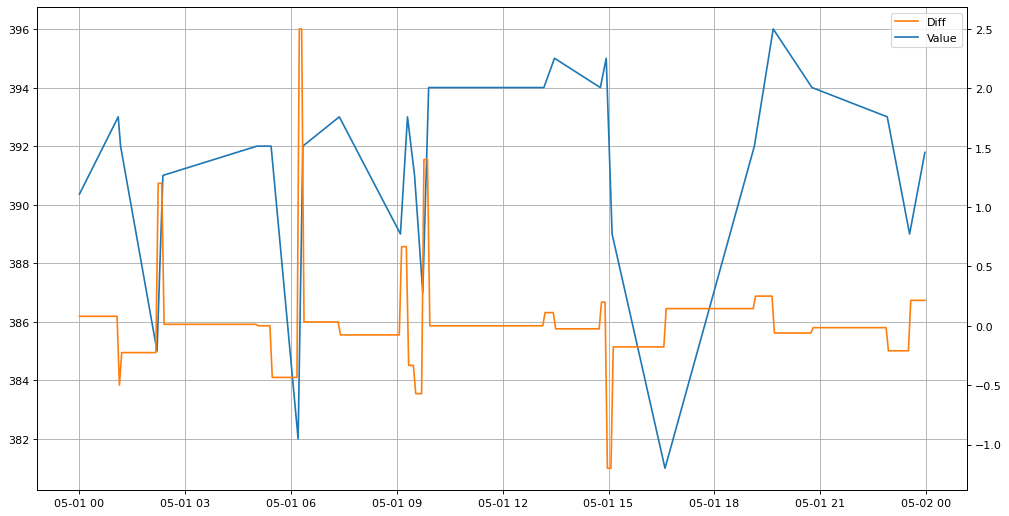

In [155]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8), dpi=80)
ax2 = ax1.twinx()
lns2 = ax1.plot(full_data.loc[full_data.index.to_series().dt.date == pd.Timestamp("2021-05-01"), "voltageAB"], color="tab:blue", label="Value")
lns1 = ax2.plot(full_data.loc[full_data.index.to_series().dt.date == pd.Timestamp("2021-05-01"), "voltage_diff"], color='tab:orange', label="Diff")
# ax1.set_xlabel('Дата')
# ax1.set_ylabel('Добыча нефти, $м^3$')
# ax2.set_ylabel('Добыча воды, $м^3$')
ax1.grid()
lns = lns1 + lns2
labels = [i.get_label() for i in lns]
ax1.legend(lns, labels, loc='best')

In [157]:
difference = np.abs(full_data["motor_temperature"] - full_data["pump_temperature"])

In [163]:
difference.var()

0.10585376991534837

In [69]:
data_summary = get_data_summary(PATH)

Skipping file curvature.csv
Skipping file dailyLosses.csv
Skipping file data_summary.csv
Skipping file eventsData.csv
Skipping file eventsData2.csv
Skipping file full_data.csv
Skipping file joined_data.csv
Skipping file measurments.csv
Skipping file rulesCheck.csv
Skipping file VSP.csv


In [193]:
files = join_data(PATH, method="union")

350350
Shape of file activePower1.csv (350350, 2), nans 0
Index(['time', 'activePower1'], dtype='object')
File activePower1.csv joined, shape of total (350350, 2)
350350
Shape of file activePower2.csv (350350, 2), nans 0
File activePower2.csv joined, shape of total (350350, 3)
Cols more than 2 : 15
Skipping file : curvature.csv
Cols more than 2 : 21
Skipping file : dailyLosses.csv
Cols more than 2 : 14
Skipping file : data_summary.csv
350350
Shape of file electicityGage.csv (350350, 2), nans 0
File electicityGage.csv joined, shape of total (350350, 4)
Cols more than 2 : 19
Skipping file : eventsData.csv
Cols more than 2 : 15
Skipping file : eventsData2.csv
350350
Shape of file frequency.csv (350350, 2), nans 0
File frequency.csv joined, shape of total (350350, 5)
Cols more than 2 : 19
Skipping file : full_data.csv
350350
Shape of file gasRate.csv (350350, 2), nans 0
File gasRate.csv joined, shape of total (350350, 6)
350350
Shape of file intakePressure.csv (350350, 2), nans 0
File inta

In [ ]:
files["opCurrent3"].isna().sum()

283615

In [136]:
data_summary = get_data_summary(PATH)

Skipping file curvature.csv
Skipping file dailyLosses.csv
Skipping file data_summary.csv
Skipping file eventsData.csv
Skipping file eventsData2.csv
Skipping file full_data.csv
Skipping file joined_data.csv
Skipping file measurments.csv
Skipping file rulesCheck.csv
Skipping file VSP.csv


In [137]:
data_summary

,file_name,total_rows,nan_rows,zero_rows,duplicates,unique_values,mean_value,mean_shift,max_shift,min_shift,min_date,max_date,well
0,activePower1,332500,0,248943,0,879,13.266202,0 days 00:01:34.831671674,1 days 07:59:48,0 days 00:00:02,2021-01-01 01:15:12,2021-12-31 23:59:08,2
1,activePower2,361815,0,1467,0,907,13.978486,0 days 00:01:27.159949587,1 days 07:56:49,0 days 00:00:30,2021-01-01 00:04:20,2021-12-31 23:59:10,2
5,electicityGage,1797,0,0,0,265,331.906060,0 days 04:51:34.861915367,1 days 16:00:22,0 days 03:04:40,2021-01-01 10:00:44,2021-12-31 02:00:16,2
8,frequency,330903,0,251034,0,703,12.513432,0 days 00:01:35.282131869,1 days 07:36:16,0 days 00:00:02,2021-01-01 01:55:00,2021-12-31 23:59:08,2
10,gasRate,2465,0,2121,0,341,786.937302,0 days 03:28:13.417207792,4 days 04:58:00,0 days 00:21:00,2021-01-09 14:50:00,2021-12-31 21:53:00,2
11,intakePressure,343529,0,0,0,117,11.020430,0 days 00:01:31.799477771,1 days 07:57:33,0 days 00:00:02,2021-01-01 00:04:17,2021-12-31 23:59:08,2
13,LinePressure,221060,0,38,150055,453,16.599770,0 days 00:09:08.017435637,1 days 12:28:04,0 days 00:00:02,2021-01-01 00:01:21,2022-03-27 08:45:11,2
14,LiquidRate,9062,0,109,6142,313,16.018947,0 days 03:37:51.140801644,5 days 01:13:00,0 days 00:00:01,2021-01-09 14:50:00,2022-03-27 05:21:00,2
16,motorLoad,330743,0,251174,0,144,14.236217,0 days 00:01:35.328225626,1 days 07:59:48,0 days 00:00:02,2021-01-01 01:55:00,2021-12-31 23:59:08,2
17,motorTemperature,343659,0,1,0,41,78.190542,0 days 00:01:31.764751584,1 days 07:36:59,0 days 00:00:02,2021-01-01 00:04:17,2021-12-31 23:59:08,2


In [199]:
opCurrent1 = pd.read_csv(PATH+"\\1\\opCurrent1.csv", parse_dates=["time"])
opCurrent1["time"] = pd.to_datetime(opCurrent1["time"])
opCurrent1.sort_values(by="time", inplace=True)
opCurrent1.set_index("time", inplace=True)

In [4]:
def func(n):
    values = np.linspace(0, n, 100)
    return np.sin(values)

C:\Users\vladv\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


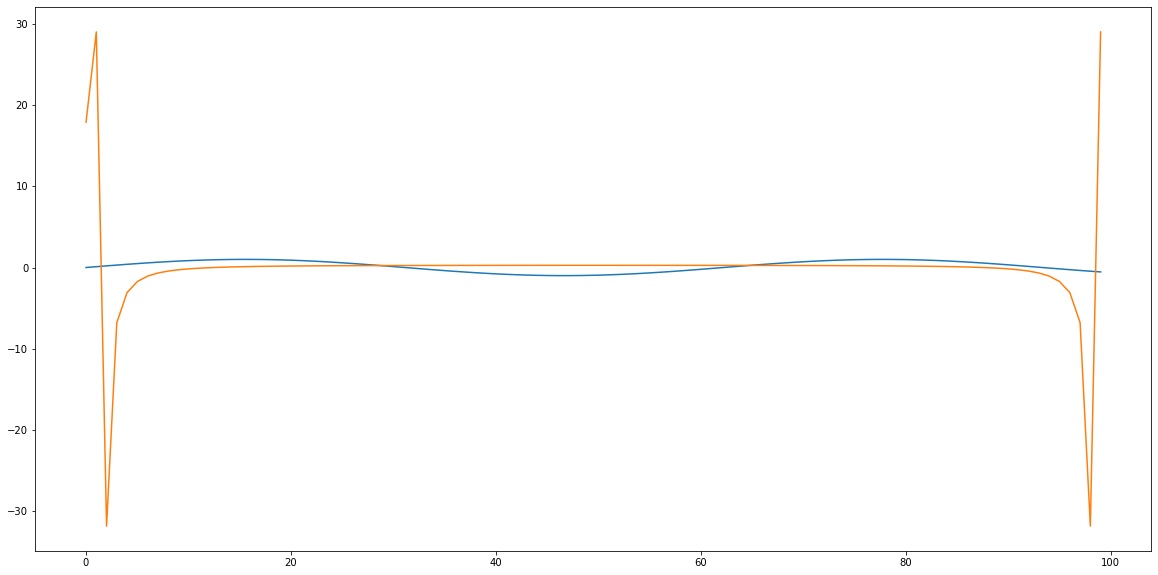

In [7]:
a = func(10)
b = np.fft.fft(a)
plt.figure(figsize=(20, 10))
plt.plot(a)
plt.plot(b)
# plt.xlim(50)

In [12]:
import pylab
import scipy.stats as stats

In [169]:
a = pd.Series(np.random.normal(loc=10, scale=5, size=1000))
b = np.random.lognormal(size=1000)
c = np.random.lognormal(size=1000)

<AxesSubplot:ylabel='Count'>

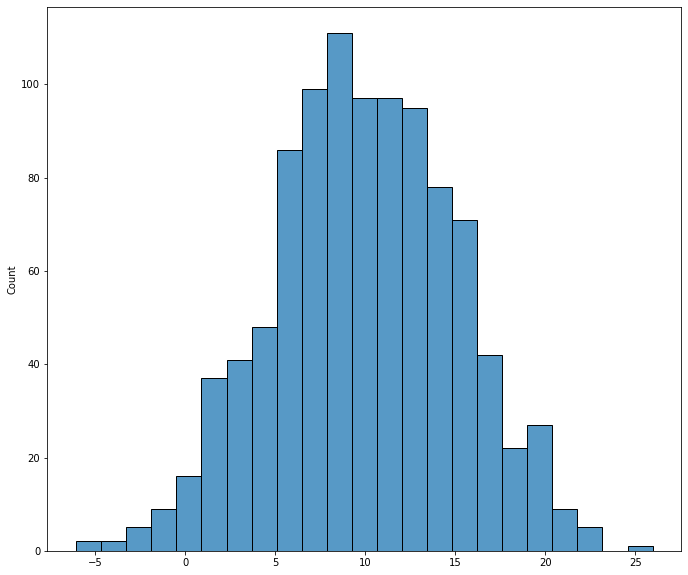

In [170]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(a)

In [164]:
# vals = np.random.lognormal(size=1000)

# for i in range(150):
#     vals += np.random.lognormal(size=1000)

In [180]:
# vals1 = pd.Series()
vals = []

for i in range(501):
    generate = a.sample(50)
    # vals1 = pd.concat([vals1, a], axis=0)
    vals.append(generate.mean())

9.999792955908598
0.7072700440699675


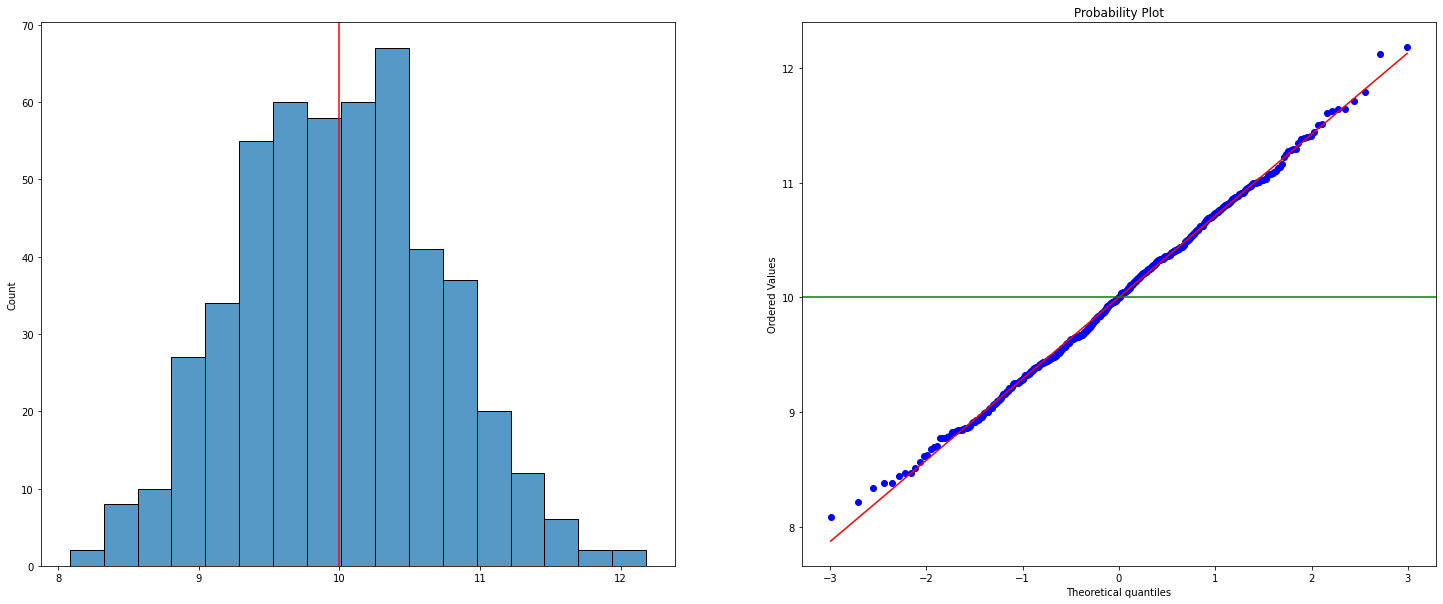

In [181]:
plt.figure(figsize=(25, 10))
print(np.mean(vals))
print(np.std(vals))
plt.subplot(1, 2, 1)
sns.histplot(vals)
plt.axvline(np.median(vals), c="r")
plt.subplot(1, 2, 2)
stats.probplot(vals, dist="norm", plot=pylab)
plt.axhline(np.median(vals), c="g")
pylab.show()

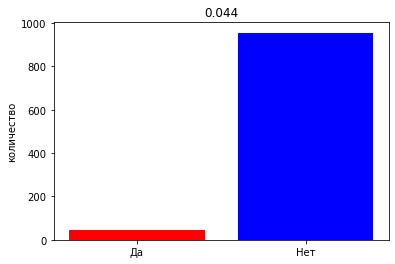

In [182]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()


false_alarm(2,30,0.05)